In [28]:
import pandas as pd
import calendar
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('../data/temixco.csv',index_col=0,parse_dates=True)

In [4]:
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:20:00', '2018-12-31 22:30:00',
               '2018-12-31 22:40:00', '2018-12-31 22:50:00',
               '2018-12-31 23:00:00', '2018-12-31 23:10:00',
               '2018-12-31 23:20:00', '2018-12-31 23:30:00',
               '2018-12-31 23:40:00', '2018-12-31 23:50:00'],
              dtype='datetime64[ns]', name='time', length=52560, freq=None)

In [5]:
df.head()

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91


In [6]:
df.columns

Index(['Ib', 'Ig', 'To', 'RH', 'WS', 'WD', 'P'], dtype='object')

<AxesSubplot:xlabel='time'>

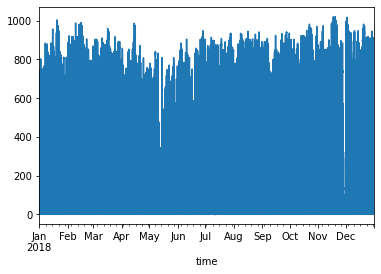

In [7]:
df["Ib"].plot()

<AxesSubplot:xlabel='time'>

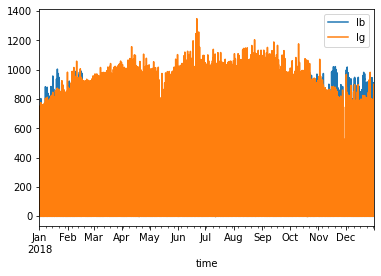

In [8]:
df[["Ib","Ig"]].plot()

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

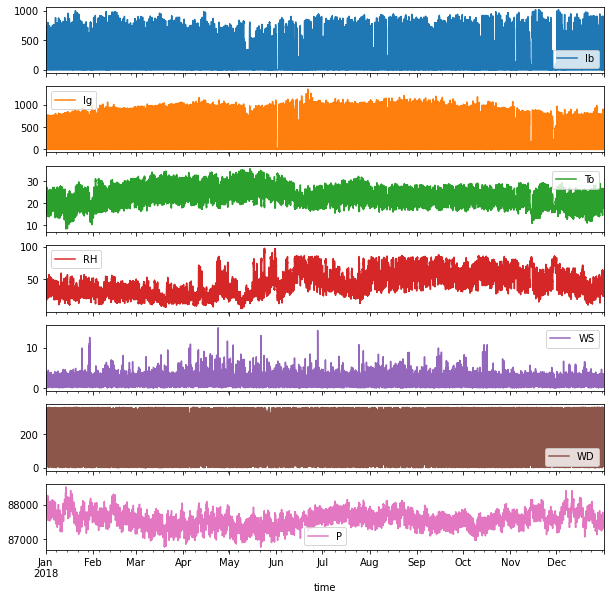

In [9]:
df.plot(subplots=True,figsize=(10,10))

array([<AxesSubplot:xlabel='time'>], dtype=object)

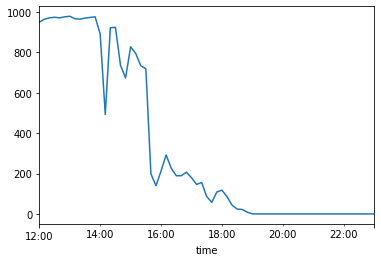

In [10]:
df.Ig.loc["2018-03-10 12:00":"2018-03-10 23:00"].plot(subplots=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ib      52423 non-null  float64
 1   Ig      52423 non-null  float64
 2   To      52560 non-null  float64
 3   RH      52560 non-null  float64
 4   WS      52560 non-null  float64
 5   WD      52560 non-null  float64
 6   P       52560 non-null  float64
dtypes: float64(7)
memory usage: 5.2 MB


In [13]:
df.head()


,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91


In [17]:
meses = calendar.month_name[1:]

In [21]:
df.To.groupby(by=[df.index.hour]).mean()


time
0     20.636274
1     20.097233
2     19.560046
3     19.083808
4     18.643740
5     18.192913
6     17.847219
7     18.528598
8     20.734027
9     22.220676
10    23.316712
11    24.531539
12    25.693922
13    26.753356
14    27.607151
15    28.119489
16    28.216557
17    27.806653
18    26.583817
19    24.791534
20    23.492630
21    22.554196
22    21.876306
23    21.225945
Name: To, dtype: float64

In [25]:
To = pd.DataFrame(df.To.groupby(by=[df.index.month,df.index.hour]).mean()).unstack().T


In [26]:
To

time            1          2          3          4          5          6   \
   time                                                                     
To 0     17.797527  21.013452  23.430914  23.038722  24.222097  20.725278   
   1     17.038118  20.359226  22.676129  22.344833  23.548548  20.424667   
   2     16.406237  19.759821  21.900699  21.774000  22.782258  20.069056   
   3     15.751398  19.020060  21.246237  21.230556  22.294194  19.710833   
   4     15.315054  18.469524  20.674140  20.588556  21.784194  19.380722   
   5     14.731774  17.912083  20.108011  19.925944  21.264194  18.967167   
   6     14.243011  17.352143  19.515806  19.667333  21.011505  18.926611   
   7     14.144946  17.177262  19.789355  20.778000  22.228871  20.020667   
   8     16.113602  19.568750  22.644624  23.237944  24.060968  21.398222   
   9     18.582742  21.940238  24.034892  24.313667  25.332473  22.435333   
   10    19.662634  23.101071  25.281505  25.626611  26.667097  23.423889   
   11    21.047473  24.426488  26.656935  27.097667  28.177581  24.520944   
   12    22.511989  25.710119  28.073656  28.414556  29.548871  25.413778   
   13    23.698978  26.940714  29.319570  29.703389  30.806183  26.349556   
   14    24.734032  27.736548  30.375269  30.679944  31.759892  27.109611   
   15    25.394462  28.568571  31.080108  31.150833  32.473441  27.594333   
   16    25.626290  28.967262  31.513226  31.264611  32.682849  27.448889   
   17    25.271613  28.759226  31.464624  30.977500  32.501290  27.067222   
   18    23.819355  27.769583  30.556720  30.136556  31.797581  26.396333   
   19    21.203441  25.858690  29.009516  28.896667  30.441667  25.065944   
   20    20.058065  24.091726  27.188172  27.495611  28.625753  23.667278   
   21    19.655054  23.379286  26.053441  25.832722  27.127043  22.594222   
   22    19.170968  22.675655  25.015699  24.846111  25.843065  21.769444   
   23    18.374194  21.880179  24.181935  23.692333  24.967581  21.095611   

time            7          8          9          10         11         12  
   time                                                                    
To 0     21.910376  19.661129  20.025889  20.056183  18.505333  17.276828  
   1     21.210376  19.261613  19.807389  19.713333  18.061167  16.754785  
   2     20.591774  19.024462  19.327056  19.205269  17.666278  16.252204  
   3     19.907366  18.792688  18.959778  18.844086  17.328056  15.943118  
   4     19.424785  18.455269  18.625000  18.541075  16.964611  15.516828  
   5     18.919462  18.220645  18.321444  18.254355  16.646056  15.051774  
   6     18.629946  17.999570  18.017833  17.951774  16.259444  14.591559  
   7     20.064624  19.058387  18.998111  18.653280  16.766722  14.611183  
   8     22.405538  20.913065  20.966111  21.080484  19.197944  17.168441  
   9     23.276720  21.888333  22.225611  22.462849  20.750056  19.405215  
   10    24.267634  22.873763  23.141333  23.405806  21.768278  20.582419  
   11    25.400108  23.957204  24.182333  24.279140  22.837556  21.801398  
   12    26.383226  24.956237  25.001167  25.309516  23.931389  23.073656  
   13    27.326828  25.764624  25.927500  26.102043  24.886944  24.227366  
   14    28.186022  26.515323  26.632722  26.756613  25.510556  25.285806  
   15    28.685806  26.903333  26.946944  27.080699  25.755167  25.810376  
   16    29.004677  26.933817  26.729833  26.867634  25.694111  25.882366  
   17    28.620968  26.318441  26.234611  26.215591  24.991667  25.286183  
   18    27.632957  25.405484  25.101833  24.513548  22.842056  23.088602  
   19    25.984355  23.872527  23.471500  22.615108  20.710333  20.438978  
   20    24.360054  22.503011  22.514444  21.817903  20.161111  19.482151  
   21    23.418441  21.286989  21.853778  20.983871  19.688611  18.848763  
   22    23.231505  20.366559  21.297111  20.616505  19.376778  18.376667  
   23    22.748172  19.931344  20.678333  20.259355  18.986722  17.964355

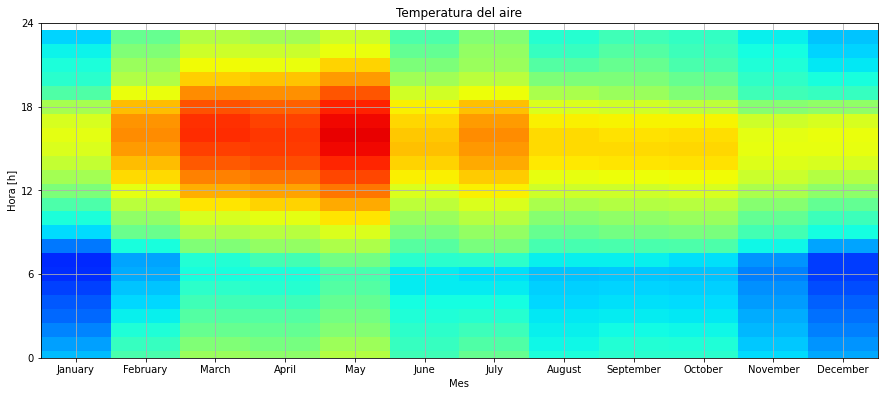

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ax.imshow(To,cmap="jet",aspect=.2,vmin=10, vmax=35)
ax.set_xticks(np.arange(0,12,1))
ax.set_ylim(0,24)
ax.set_yticks(np.linspace(0,24,5))
ax.set_xticklabels(meses)
ax.set_ylabel("Hora [h]")
ax.set_xlabel("Mes")
ax.set_title("Temperatura del aire")
ax.grid()


In [32]:
To = df.groupby(by=([df.index.hour,df.index.minute]))['To'].mean()
HR = df.groupby(by=([df.index.hour,df.index.minute]))['RH'].mean()

In [34]:
HR

time  time
0     0       51.322849
      10      51.585315
      20      51.860411
      30      52.135534
      40      52.390247
                ...    
23    10      49.816658
      20      49.992247
      30      50.284575
      40      50.665836
      50      51.033753
Name: RH, Length: 144, dtype: float64

<AxesSubplot:xlabel='time,time'>

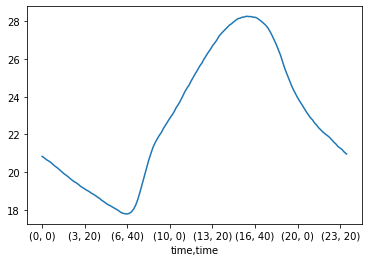

In [36]:
df.groupby(by=([df.index.hour,df.index.minute]))['To'].mean().plot()


In [42]:
To = df.groupby(by=(df.index.strftime('%H:%M')))['To'].mean()
HR = df.groupby(by=(df.index.strftime('%H:%M')))['RH'].mean()

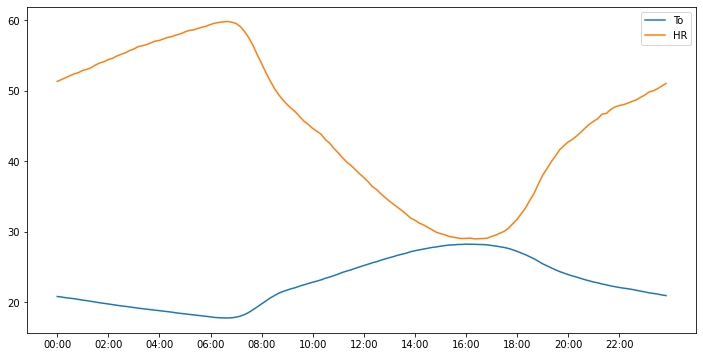

In [43]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(To,label='To')
ax.plot(HR,label='HR')

ax.set_xticks(np.arange(0,144,12))
ax.legend()


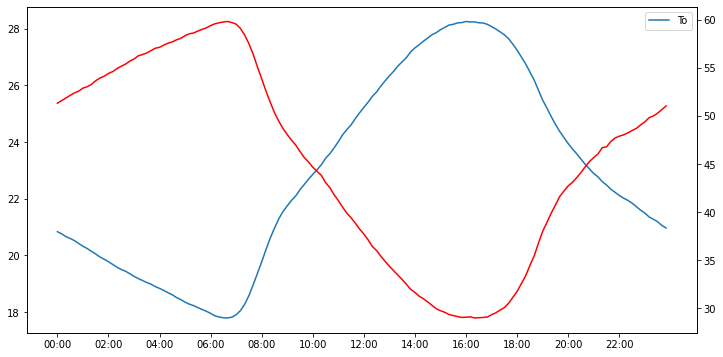

In [44]:
fig,ax = plt.subplots(figsize=(12,6))

ax2 = ax.twinx()  


ax.plot (To,label='To')
ax2.plot(HR,label='HR',c='red')

ax.set_xticks(np.arange(0,144,12))
ax.legend()

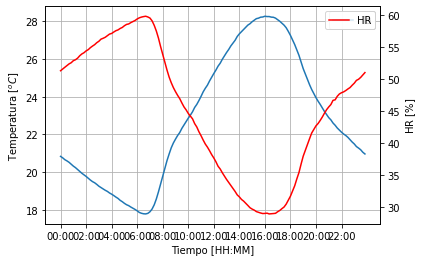

In [46]:
fig,ax = plt.subplots(figsize=(6,4))

ax2 = ax.twinx() 


ax.plot (To,label='To')
ax2.plot(HR,label='HR',c='red')

ax.set_xticks(np.arange(0,144,12))
ax.legend()


ax.grid()
ax.set_xlabel('Tiempo [HH:MM]')
ax.set_ylabel('Temperatura [$^oC$]')
ax2.set_ylabel('HR [$\%$]')
ax2.legend(loc=1)